<a href="https://colab.research.google.com/github/lazy-wav/Vastra-AI/blob/main/vastra_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install keras
!pip install tqdm
!pip install pickle
!pip install matplotlib-venn
!pip install kaggle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d ronakbokaria/myntra-products-dataset

Dataset URL: https://www.kaggle.com/datasets/ronakbokaria/myntra-products-dataset
License(s): CC0-1.0
 95% 109M/115M [00:01<00:00, 74.8MB/s] 
100% 115M/115M [00:01<00:00, 74.0MB/s]


In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import keras.layers
import keras.applications
import tensorflow.keras.applications.resnet50

In [5]:
import tensorflow
import keras
from numpy.linalg import norm
from tqdm import tqdm
import pickle

In [6]:
# extracting the data zipped file
from zipfile import ZipFile
dataset='/content/myntra-products-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print ('Dataset extracted successfully!')

Dataset extracted successfully!


In [7]:
from keras.preprocessing import image
from keras.layers import GlobalMaxPooling2D
from keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
articles = pd.read_csv("/content/myntra202305041052.csv")
customers = pd.read_csv("/content/myntra202305041052.csv")
transactions = pd.read_csv("/content/myntra202305041052.csv")

In [9]:
#loading data from csv_file to pd
data=pd.read_csv('/content/myntra202305041052.csv', encoding ='ISO-8859-1')

In [10]:
data.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


In [11]:
# Randomly sample 50 images
subset_data = data.sample(n=50, random_state=42)

# Display the subset
subset_data.head()


,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
97504,97505,Pack of 2 Skinny Fit Capris,-,-,455.0,1899.0,0.0,0,76,Apraa & Parma,https://www.myntra.com/capris/apraa--parma/apr...
843320,843321,Men Typography Printed T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,449.0,499.0,3.9,19,10,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
239318,239319,360deg Beauty Full Coverage Brightening & Corr...,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,548.0,645.0,0.0,0,15,Just Herbs,https://www.myntra.com/concealer/just-herbs/ju...
645530,645531,Solid Ribbed Top,-,-,1574.0,3499.0,4.8,5,55,NA-KD,https://www.myntra.com/tops/na-kd/na-kd-lavend...
945049,945050,130 TC Single 1 Pillow Covers,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,582.0,2329.0,0.0,0,75,Arrabi,https://www.myntra.com/bedsheets/arrabi/arrabi...


In [12]:
# Check for missing values and remove any rows with missing URLs
subset_data = subset_data.dropna(subset=['img'])

# Verify the URLs are valid (basic check)
subset_data = subset_data[subset_data['img'].str.startswith('http')]

# Display the cleaned subset
subset_data.head()


,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
843320,843321,Men Typography Printed T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,449.0,499.0,3.9,19,10,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
239318,239319,360deg Beauty Full Coverage Brightening & Corr...,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,548.0,645.0,0.0,0,15,Just Herbs,https://www.myntra.com/concealer/just-herbs/ju...
945049,945050,130 TC Single 1 Pillow Covers,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,582.0,2329.0,0.0,0,75,Arrabi,https://www.myntra.com/bedsheets/arrabi/arrabi...
181273,181274,Pack of 2 Perfume + Deodorant,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,599.0,1500.0,0.0,0,901,JOHN PHILLIPS,https://www.myntra.com/perfume-and-body-mist/j...
637932,637933,His & Her Analogue Watch Gift Set,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,799.0,3999.0,3.9,11,3200,CARLINGTON,https://www.myntra.com/watch-gift-set/carlingt...


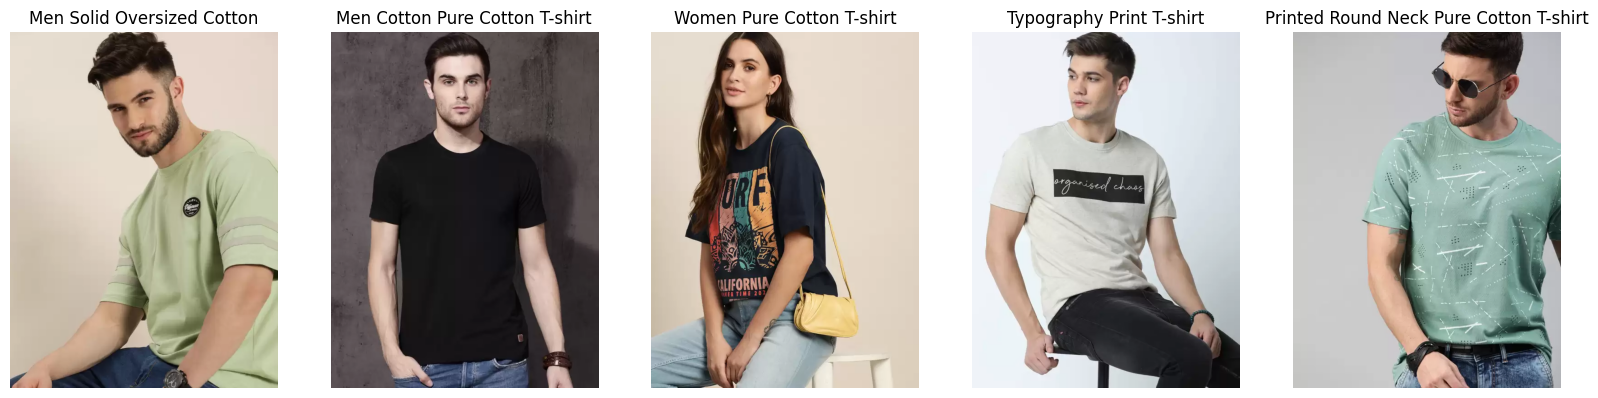

In [13]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

def display_images(df, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    for i, row in data.iterrows():
        if i >= num_images:
            break
        response = requests.get(row['img'])
        img = Image.open(BytesIO(response.content))
        axes[i].imshow(img)
        axes[i].set_title(row['name'])
        axes[i].axis('off')

# Display first 5 images
display_images(subset_data, num_images=5)


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input

# Define the autoencoder
input_img = Input(shape=(224, 224, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Prepare a subset of images
import pandas as pd
import numpy as np
from PIL import Image
import requests
from io import BytesIO

data = pd.read_csv('/content/myntra202305041052.csv')
image_urls = data['img'][:50]  # Select the first 50 images
images = []

for url in image_urls:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).resize((224, 224))
    images.append(np.array(img) / 255.0)  # Normalize the images

images = np.array(images)

# Train the autoencoder
autoencoder.fit(images, images, epochs=50, batch_size=5, shuffle=True, validation_split=0.2)

# Save the autoencoder
autoencoder.save('autoencoder_model.keras')


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - loss: 0.6817 - val_loss: 0.6806
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - loss: 0.6550 - val_loss: 0.6903
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - loss: 0.6181 - val_loss: 0.6290
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - loss: 0.6080 - val_loss: 0.5876
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - loss: 0.5763 - val_loss: 0.5729
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - loss: 0.5587 - val_loss: 0.5599
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - loss: 0.5394 - val_loss: 0.5536
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - loss: 0.5368 - val_loss: 0.5442
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - loss: 0.5299 - val_loss: 0.5408
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - loss: 0.5243 - val_loss: 0.5386
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - loss: 0.5261 - val_loss: 0.5376
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - loss: 0.5373 - val_loss: 0.5391
Epoch 13/50
8

In [21]:
# Create an encoder model
encoder = Model(input_img, encoded)

# Encode the images
encoded_images = encoder.predict(images)
encoded_images = encoded_images.reshape((encoded_images.shape[0], -1))  # Flatten the encoded features


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


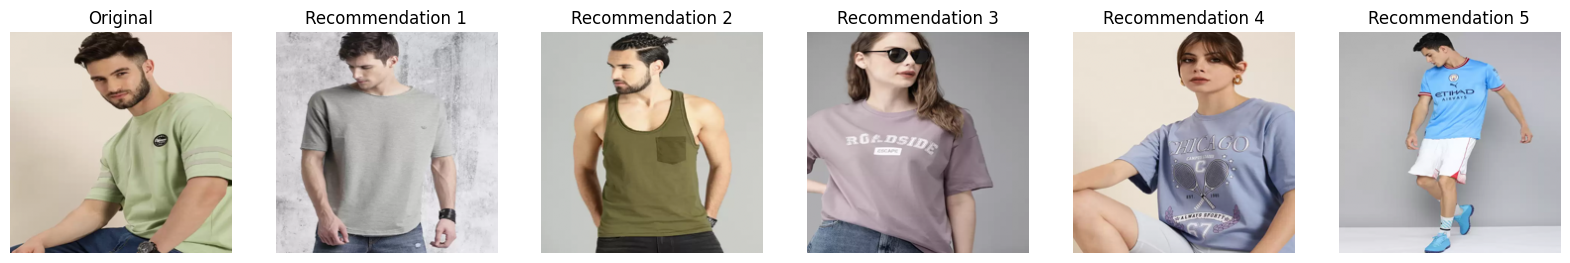

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Function to find similar images
def find_similar_images(encoded_images, image_index, top_n=5):
    distances = np.linalg.norm(encoded_images - encoded_images[image_index], axis=1)
    similar_indices = distances.argsort()[1:top_n+1]
    return similar_indices

# Display the recommendations
def display_recommendations(image_index, similar_indices):
    fig, axes = plt.subplots(1, len(similar_indices) + 1, figsize=(20, 20))
    # Display the original image
    axes[0].imshow(images[image_index])
    axes[0].set_title("Original")
    axes[0].axis('off')

    # Display similar images
    for i, idx in enumerate(similar_indices):
        axes[i+1].imshow(images[idx])
        axes[i+1].set_title(f"Recommendation {i+1}")
        axes[i+1].axis('off')

# Test with the first image
similar_indices = find_similar_images(encoded_images, 0)
display_recommendations(0, similar_indices)
